In [75]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [76]:
TWEMOJI_DATASET = './datasets/samples/combined_csv.csv'
EMOJI_MAPPINGS = './datasets/emoji_map_1791.csv'

In [77]:
twemoji = pd.read_csv(TWEMOJI_DATASET)

In [78]:
mappings = pd.read_csv(EMOJI_MAPPINGS)

In [79]:
twemoji = twemoji.reindex(np.random.permutation(twemoji.index))

# Mappings

In [80]:
# we can see that we now have the dataframe that contain all 
# the emoji mappings
mappings.head(5) 

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
0,#️⃣,symbols,keycap number sign,[hash],0023-fe0f-20e3,"[keycap, symbol, pound, hash, number]",0023_fe0f_20e3,#️⃣,NaN,NaN,NaN
1,*️⃣,symbols,keycap asterisk,[asterisk],002a-fe0f-20e3,"[keycap, symbol, asterisk, star]",002a_fe0f_20e3,*️⃣,[:keycap_asterisk:],NaN,NaN
2,0️⃣,symbols,keycap digit zero,[zero],0030-fe0f-20e3,"[, keycap, symbol, number, zero, math]",0030_fe0f_20e3,0️⃣,NaN,NaN,NaN
3,1️⃣,symbols,keycap digit one,[one],0031-fe0f-20e3,"[, keycap, symbol, number, one, math]",0031_fe0f_20e3,1️⃣,NaN,NaN,NaN
4,2️⃣,symbols,keycap digit two,[two],0032-fe0f-20e3,"[, keycap, symbol, two, number, math]",0032_fe0f_20e3,2️⃣,NaN,NaN,NaN


# Cleaning and Preparing

In [81]:
# lets see how many columns 
# does the dataset have
twemoji.columns

Index(['id', 'annotations', 'id_text'], dtype='object')

In [82]:
# rename annotations to target
# rename id_text to tweet
twemoji = twemoji.rename(columns={"annotations":'target', "id_text":"text"})

In [83]:
twemoji.head() 

,id,target,text
306825,743138885769715712,1235,NaN
822790,741539141712642048,830,NaN
3103234,744338959141044225,1436,NaN
1151496,746430755849461760,1381,NaN
3519611,746417628084854785,186,NaN


In [84]:
# since the id column is no longer needed
# we can simply drop it
twemoji = twemoji.drop(columns=["id"])

In [85]:
twemoji.head()

,target,text
306825,1235,NaN
822790,830,NaN
3103234,1436,NaN
1151496,1381,NaN
3519611,186,NaN


In [86]:
# Lets check how many null values exist in 
# the dataset
twemoji['text'].isna().sum()

3878060

In [87]:
# We can't do much with null values
# So we drop them
twemoji = twemoji.dropna()

In [88]:
twemoji.head()

,target,text
1326151,1392,my boy
1763528,1391,Getting my nails did and stuff tomorrow
364916,1381,Love how I try to make plans with someone and ...
1949039,1415,Some gotta change
2016380,1424,"Sorry, no"


In [89]:
# Lets check how big is the data set now
twemoji.shape

(88567, 2)

# Exploration

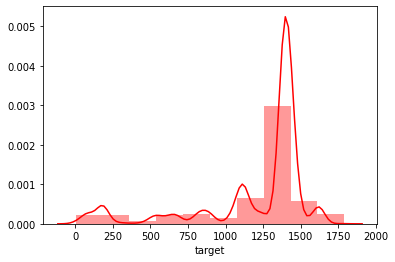

In [90]:
# lets see the distribution of our target values
sns.distplot(twemoji['target'], color='red', bins=10)

In [91]:
most_frequent = twemoji['target'].value_counts().idxmax() 
most_frequent

1381

In [92]:
# The laughing face emoji is the most popular in this dataset
mappings.loc[most_frequent]

Unnamed: 0                                                            😂
category                                                         people
title                                            face with tears of joy
shorts                                                            [joy]
unicode_alternates                                                  NaN
keywords              [emotion, cry, tear, joy, smiley, sarcastic, f...
ucode_short                                                       1f602
ucode                                                                 😂
aliases                                                             NaN
alt_title                                                           NaN
aliases_ascii                                               [:'), :'-)]
Name: 1381, dtype: object

In [93]:
# Lets see the 10 most frequently used emojis
top_ten = twemoji['target'].value_counts()[:10].index.tolist() 
top_ten

[1381, 1447, 1424, 1392, 1389, 186, 1620, 1420, 1446, 1403]

In [94]:
# lets see the mappings
mappings.loc[top_ten]

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
1381,😂,people,face with tears of joy,[joy],NaN,"[emotion, cry, tear, joy, smiley, sarcastic, f...",1f602,😂,NaN,NaN,"[:'), :'-)]"
1447,🙄,people,face with rolling eyes,"[rolling_eyes, face_with_rolling_eyes]",NaN,"[emotion, eyes, rolling eyes, smiley, sarcasti...",1f644,🙄,[:face_with_rolling_eyes:],NaN,NaN
1424,😭,people,loudly crying face,[sob],NaN,"[emotion, sob, tear, cry, smiley, sad, heartbr...",1f62d,😭,NaN,NaN,NaN
1392,😍,people,smiling face with heart shaped eyes,[heart_eyes],NaN,"[emotion, heart, eye, love, smiley, face, beau...",1f60d,😍,NaN,smiling face with heart-shaped eyes,NaN
1389,😊,people,smiling face with smiling eyes,[blush],NaN,"[emotion, beautiful, good, eye, smiley, face, ...",1f60a,😊,NaN,NaN,NaN
186,❤,symbols,heavy black heart,[heart],2764-fe0f,"[heart, symbol, love, parties]",2764,❤,NaN,NaN,[<3]
1620,🤔,people,thinking face,"[thinking, thinking_face]",NaN,"[thinking, boys night, smiley, face]",1f914,🤔,[:thinking_face:],NaN,NaN
1420,😩,people,weary face,[weary],NaN,"[emotion, tired, face, smiley, sad, stressed, ...",1f629,😩,NaN,NaN,NaN
1446,🙃,people,upside down face,"[upside_down_face, upside_down]",NaN,"[smiley, silly, upside down, sarcastic, face]",1f643,🙃,[:upside_down_face:],upside-down face,NaN
1403,😘,people,face throwing a kiss,[kissing_heart],NaN,"[heart, love, smiley, face, kiss, sexy]",1f618,😘,NaN,NaN,"[:*, :-*, =*, :^*]"


In [95]:
# We see that there is a high density around 1000-1500
# lets reduce the number of emojis there exists to the
# top 10 emojis that exists in the dataset
# we could reduce the complexity of our problem. 
index_names = twemoji[~twemoji['target'].isin(top_ten)].index
twemoji = twemoji.drop(index_names)

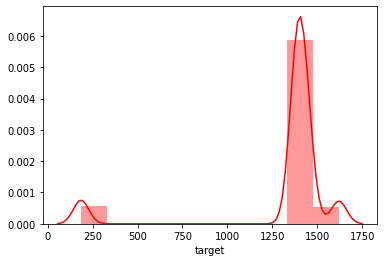

In [96]:
# lets see the distribution once again
sns.distplot(twemoji['target'], color='red', bins=10)

In [97]:
# For sanity check lets see if the remaining emojis
# are only the top ten emojis
twemoji['target'].value_counts().index.tolist() 

[1381, 1447, 1424, 1392, 1389, 186, 1620, 1420, 1446, 1403]

In [98]:
twemoji.shape

(32895, 2)

## Using NLTK

In [99]:
corpus = nltk.Text(twemoji['text'])

In [100]:
len(corpus)

32895

### Lexical Rishness

We can check how many times a word is used on average.
It's good that a corpus is lexically rich as, theoretically,
the MT system will 'learn' how to deal with a broader range of words.
This indicator can be obtained by dividing `total number of words` by `number of unique words`

In [101]:
len(corpus) / len(set(corpus))

1.0325506937033084

In [102]:
# Lets check the frequencies of words
fdistcorpus = nltk.FreqDist(corpus)
fdistcorpus

FreqDist({'thank you': 62, 'thanks': 32, 'Thank you': 27, 'Same': 25, 'same': 20, 'I know': 19, 'thank you ': 18, 'love you': 13, 'Thanks': 12, 'Bruh': 12, ...})

In [103]:
fdistcorpus.most_common(10) 

[('thank you', 62),
 ('thanks', 32),
 ('Thank you', 27),
 ('Same', 25),
 ('same', 20),
 ('I know', 19),
 ('thank you ', 18),
 ('love you', 13),
 ('Thanks', 12),
 ('Bruh', 12)]

## Tokenize and Stop Words

We will use the `NLTK` library to tokenize our dataset. After performing the tokenization, we could use the Porter stemming algorithm (also part of `NLTK`) to remove reduce words to their root form and later remove all the stopwords from each datapoint. 

1. We will tokenize each sentence by 


In [104]:
from nltk.stem.porter import PorterStemmer

In [105]:
def tokenizer(text): 
    return text.split()

In [106]:
porter = PorterStemmer()

In [107]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [108]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frankpalma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
from nltk.corpus import stopwords

stop = stopwords.words('english') 

In [110]:
# Spliting test and test set
from sklearn.model_selection import train_test_split
X = twemoji['text'] 
y = twemoji['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
def print_scores(model):
    print('Best parameter set: %s ' % model.best_params_)
    print('CV Accuracy: %.3f' % model.best_score_)
    clf = model.best_estimator_
    print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

In [113]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

In [114]:
lr_param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words' : [stop, None],
               'vect__tokenizer' : [tokenizer, tokenizer_porter], 
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0],
              }, 
              {
                'vect__ngram_range' : [(1, 1)], 
                'vect__stop_words' : [stop, None],
                'vect__tokenizer' : [tokenizer, tokenizer_porter], 
                'vect__use_idf' : [False],
                'vect__norm' : [None],
                'clf__penalty' : ['l1', 'l2'],
                'clf__C': [1.0, 10.0, 100.0],
              }
             ] 

In [116]:
svm_param_grid = [{'vect__ngram_range': [(1, 1)],
                   'vect__stop_words' : [stop, None],
                   'vect__tokenizer' : [tokenizer, tokenizer_porter],
                   'clf__kernel': ['rbf'],
                   'clf__gamma': [1e-3, 1e-4],
                   'clf__C': [1, 10, 100, 1000],
                  },
                  {
                    'vect__ngram_range' : [(1, 1)], 
                    'vect__stop_words' : [stop, None],
                    'vect__tokenizer' : [tokenizer, tokenizer_porter], 
                    'vect__use_idf' : [False],
                    'vect__norm' : [None],
                    'clf__kernel': ['rbf'],
                    'clf__gamma': [1e-3, 1e-4],
                    'clf__C': [1, 10, 100, 1000], 
                   }
]

In [ ]:
multiNB_param_grid = [
    {
        'vect__ngram_range': [(1, 1)],
        'vect__stop_words' : [stop, None],
        'vect__tokenizer' : [tokenizer, tokenizer_porter],
    },
    {
        'vect__ngram_range' : [(1, 1), (1, 2), (1, 3)], 
        'vect__stop_words' : [stop, None],
        'vect__tokenizer' : [tokenizer, tokenizer_porter], 
        'vect__use_idf' : [False],
        'vect__norm' : [None], 
        'clf__estmator'
        
    }
    
]

In [118]:
lr_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(random_state=0))])
svm_tfidf = Pipeline([('vect', tfidf), ('clf', SVC(random_state=0))])

In [119]:
gs_lr_tfidf = GridSearchCV(lr_tfidf, lr_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_svm_tfidf = GridSearchCV(svm_tfidf, svm_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [120]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [121]:
print_scores(gs_lr_tfidf)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1b6028d40>} 
CV Accuracy: 0.343
Test Accuracy: 0.344


In [122]:
gs_svm_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 47.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [123]:
print_scores(gs_svm_tfidftfidftfidf)

Best parameter set: {'clf__C': 1000, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x1b6028d40>, 'vect__use_idf': False} 
CV Accuracy: 0.336
Test Accuracy: 0.336


## Bag-Of-Words Model

`Bag of words` allows us to represent text as numberical feature vectors. 
This idea behind the bag of words model can be summarized as follows

1. Create a vocabulary of unique tokens, for example words, from the entire set of documents
2. Concstruct a feature vector from each document that contains the counts of how often wach word occurs
    in the particular document
    
Unique words in documents represent only a small subset of all words in the `bag of words` vocabulary, therfore the feature vectors will mostly consist of zeros, which is why we call them `sparse`
